<a href="https://colab.research.google.com/github/skytecat/PredictingRoadAccidentRisk/blob/main/road_accident_risk_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Road_risk/train.csv')

In [6]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [3]:
data = data.drop('id', axis=1)

In [4]:
data['road_signs_present'] = data['road_signs_present'].astype(int)
data['public_road'] = data['public_road'].astype(int)
data['holiday'] = data['holiday'].astype(int)
data['school_season'] = data['school_season'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  int64  
 7   public_road             517754 non-null  int64  
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  int64  
 10  school_season           517754 non-null  int64  
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 51.4+ MB


In [13]:
data

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,0,1,afternoon,0,1,1,0.13
1,urban,4,0.99,35,daylight,clear,1,0,evening,1,1,0,0.35
2,rural,4,0.63,70,dim,clear,0,1,morning,1,0,2,0.30
3,highway,4,0.07,35,dim,rainy,1,1,morning,0,0,1,0.21
4,rural,1,0.58,60,daylight,foggy,0,0,evening,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,1,1,afternoon,0,0,2,0.32
517750,rural,4,0.47,35,daylight,rainy,1,1,morning,0,0,1,0.26
517751,urban,4,0.62,25,daylight,foggy,0,0,afternoon,0,1,0,0.19
517752,highway,3,0.63,25,night,clear,1,0,afternoon,1,1,3,0.51


## Анализ численных атрибутов

In [5]:
numerical_data = data.select_dtypes(include=['number'])

In [22]:
numerical_data.describe()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,0.499204,0.502256,0.503498,0.497514,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.500000,0.499995,0.499988,0.499994,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [23]:
numerical_data.isnull().sum()

,0
num_lanes,0
curvature,0
speed_limit,0
road_signs_present,0
public_road,0
holiday,0
school_season,0
num_reported_accidents,0
accident_risk,0


In [15]:
numerical_data

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
0,2,0.06,35,0,1,0,1,1,0.13
1,4,0.99,35,1,0,1,1,0,0.35
2,4,0.63,70,0,1,1,0,2,0.30
3,4,0.07,35,1,1,0,0,1,0.21
4,1,0.58,60,0,0,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...
517749,4,0.10,70,1,1,0,0,2,0.32
517750,4,0.47,35,1,1,0,0,1,0.26
517751,4,0.62,25,0,0,0,1,0,0.19
517752,3,0.63,25,1,0,1,1,3,0.51


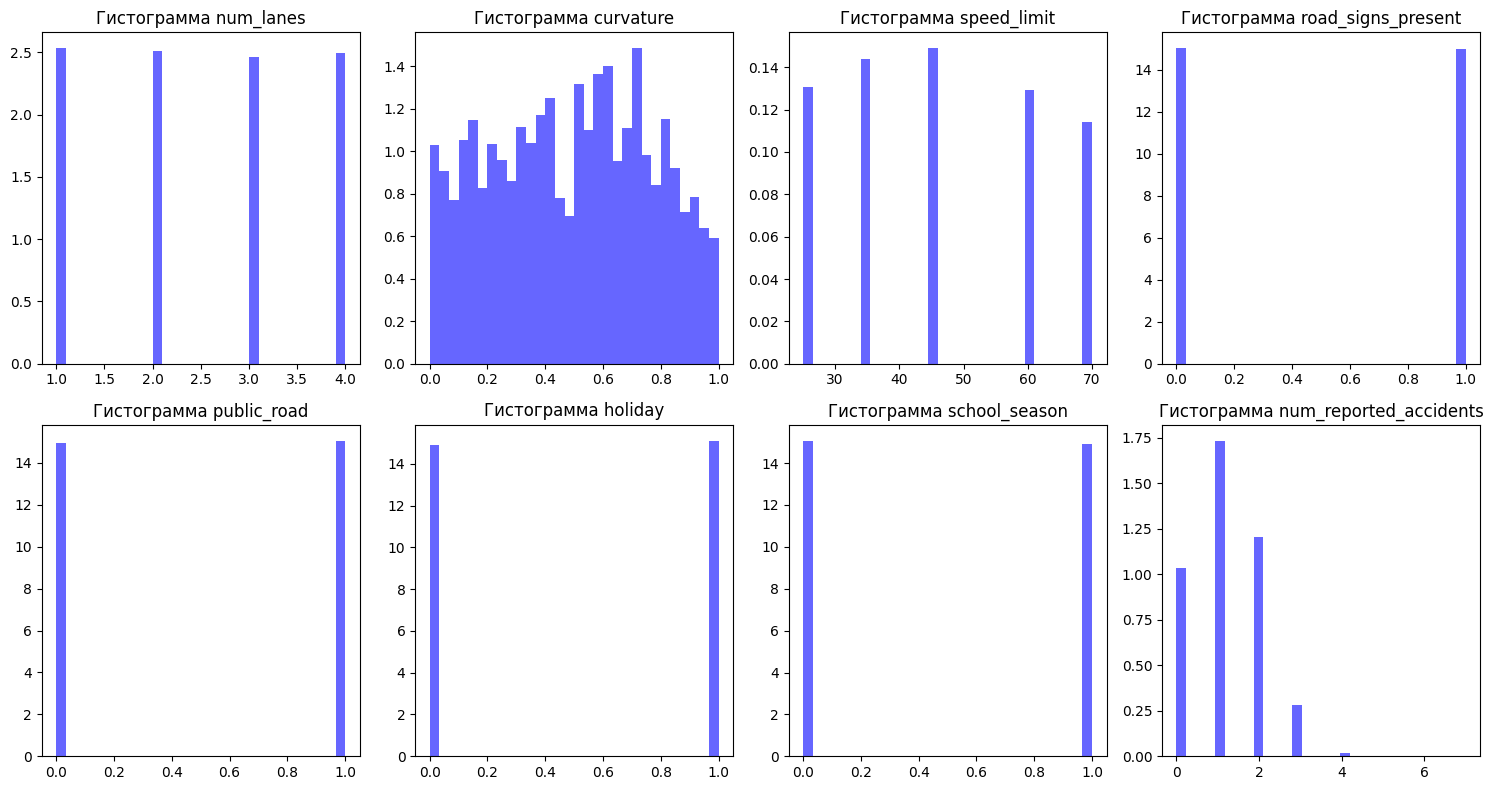

In [29]:
import matplotlib.pyplot as plt

# # Пример данных: 8 столбцов
# data = np.random.randn(1000, 8)  # 1000 строк, 8 столбцов
# columns = [f'feature_{i}' for i in range(8)]
# df = pd.DataFrame(data, columns=columns)

columns = numerical_data.columns[:8]
# Создаём сетку 2x4 (2 строки, 4 столбца)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Плоский список осей для удобного цикла
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].hist(data[col], bins=30, density=True, alpha=0.6, color='b')
    axes[i].set_title(f'Гистограмма {col}')

# Убираем пустые подграфики, если нужно
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
# Числовые признаки
numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

# Бинарные (логические) признаки
binary_features = ['road_signs_present', 'public_road', 'holiday', 'school_season']

In [7]:
y = data['accident_risk']
X = data.drop('accident_risk', axis=1)

## Анализ категориальных атрибутов

In [9]:
cat_features = X.select_dtypes(include=['object'])

In [24]:
cat_features

,road_type,lighting,weather,time_of_day
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening
...,...,...,...,...
517749,highway,daylight,foggy,afternoon
517750,rural,daylight,rainy,morning
517751,urban,daylight,foggy,afternoon
517752,highway,night,clear,afternoon


In [25]:
cat_features.isnull().sum()

,0
road_type,0
lighting,0
weather,0
time_of_day,0


In [12]:
cat_features['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

In [13]:
cat_features['lighting'].unique()

array(['daylight', 'dim', 'night'], dtype=object)

In [14]:
cat_features['weather'].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

In [15]:
cat_features['time_of_day'].unique()

array(['afternoon', 'evening', 'morning'], dtype=object)

In [16]:
from sklearn.preprocessing import OneHotEncoder

# train_data = pd.DataFrame({
#     'road_type': ['urban', 'rural', 'highway'],
#     'lighting': ['daylight', 'dim', 'night']
# })

# Создаём OneHotEncoder с handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Обучаем энкодер на тренировке
encoder.fit(cat_features)

# Применяем к тренировке и тесту
train_encoded = pd.DataFrame(
    encoder.transform(cat_features),
    columns=encoder.get_feature_names_out(['road_type', 'lighting', 'weather', 'time_of_day']),
    index=cat_features.index
)

# test_encoded = pd.DataFrame(
#     encoder.transform(test_data),
#     columns=encoder.get_feature_names_out(['road_type', 'lighting']),
#     index=test_data.index
# )

print("Train Encoded:")
print(train_encoded)
# print("\nTest Encoded:")
# print(test_encoded)

Train Encoded:
        road_type_rural  road_type_urban  lighting_dim  lighting_night  \
0                   0.0              1.0           0.0             0.0   
1                   0.0              1.0           0.0             0.0   
2                   1.0              0.0           1.0             0.0   
3                   0.0              0.0           1.0             0.0   
4                   1.0              0.0           0.0             0.0   
...                 ...              ...           ...             ...   
517749              0.0              0.0           0.0             0.0   
517750              1.0              0.0           0.0             0.0   
517751              0.0              1.0           0.0             0.0   
517752              0.0              0.0           0.0             1.0   
517753              0.0              0.0           1.0             0.0   

        weather_foggy  weather_rainy  time_of_day_evening  time_of_day_morning  
0              

## Создание новых атрибутов

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit(X[numerical_features])
X_poly = pd.DataFrame(
    poly.fit_transform(X[numerical_features]),
    columns=poly.get_feature_names_out(numerical_features)
)

In [25]:
X_poly

,num_lanes,curvature,speed_limit,num_reported_accidents,num_lanes^2,num_lanes curvature,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2
0,2.0,0.06,35.0,1.0,4.0,0.12,70.0,2.0,0.0036,2.10,0.06,1225.0,35.0,1.0
1,4.0,0.99,35.0,0.0,16.0,3.96,140.0,0.0,0.9801,34.65,0.00,1225.0,0.0,0.0
2,4.0,0.63,70.0,2.0,16.0,2.52,280.0,8.0,0.3969,44.10,1.26,4900.0,140.0,4.0
3,4.0,0.07,35.0,1.0,16.0,0.28,140.0,4.0,0.0049,2.45,0.07,1225.0,35.0,1.0
4,1.0,0.58,60.0,1.0,1.0,0.58,60.0,1.0,0.3364,34.80,0.58,3600.0,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,4.0,0.10,70.0,2.0,16.0,0.40,280.0,8.0,0.0100,7.00,0.20,4900.0,140.0,4.0
517750,4.0,0.47,35.0,1.0,16.0,1.88,140.0,4.0,0.2209,16.45,0.47,1225.0,35.0,1.0
517751,4.0,0.62,25.0,0.0,16.0,2.48,100.0,0.0,0.3844,15.50,0.00,625.0,0.0,0.0
517752,3.0,0.63,25.0,3.0,9.0,1.89,75.0,9.0,0.3969,15.75,1.89,625.0,75.0,9.0


In [29]:
X_added = pd.concat([train_encoded, X_poly, X[binary_features]], axis=1)

In [30]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.0036,2.10,0.06,1225.0,35.0,1.0,0,1,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.9801,34.65,0.00,1225.0,0.0,0.0,1,0,1,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,0.3969,44.10,1.26,4900.0,140.0,4.0,0,1,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.0049,2.45,0.07,1225.0,35.0,1.0,1,1,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.3364,34.80,0.58,3600.0,60.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.0100,7.00,0.20,4900.0,140.0,4.0,1,1,0,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.2209,16.45,0.47,1225.0,35.0,1.0,1,1,0,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.3844,15.50,0.00,625.0,0.0,0.0,0,0,0,1
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,0.3969,15.75,1.89,625.0,75.0,9.0,1,0,1,1


In [35]:
X_added['bad_weather'] = X['weather'].isin(['rainy', 'foggy']).astype(int)
X_added['bad_visivility'] = (X['weather'].isin(['rainy', 'foggy']) & X['lighting'].isin(['dim', 'night'])).astype(int)

In [36]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.06,1225.0,35.0,1.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.00,1225.0,0.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,1.26,4900.0,140.0,4.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.07,1225.0,35.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.58,3600.0,60.0,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.20,4900.0,140.0,4.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.47,1225.0,35.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.00,625.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,1.89,625.0,75.0,9.0,1,0,1,1,0,0


## Тестирование на простой модели и отбор признаков

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_norm = pd.DataFrame(
    scaler.fit_transform(X[numerical_features]),
    columns=numerical_features,
    index=X.index
)

In [ ]:
X_norm =

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Объединяем числовые и бинарные
X_processed = pd.concat([X_num_norm, X[binary_features], X[cat_features]], axis=1)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [ ]:
# Получаем коэффициенты
feature_importance = abs(model.coef_[0])  # берем абсолютные значения

# Создаём DataFrame для удобства
feature_names = X_train.columns  # имена признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print(importance_df)